In [6]:
#import useful packages

import sys
import pandas as pd
import matplotlib
import numpy as np
import scipy as sp
import IPython
import sklearn
import mglearn

# Classifying Iris Species

A hobby botanist is interested in distinguishing the species of some iris flowers that she has found. She has collected some measurements:
- The length and width of the petals
- The length and width of the sepals

She also has the measurements of some Irises that have been identified to the species:
- setosa
- versicolor 
- virginica

Our goal is to build a ML model that can be learn from the measurements of these irises whose species is known, so that we can predict the species for new irises. This is an example of a *classification* problem.

In [7]:
from sklearn.datasets import load_iris
iris_data = load_iris()

# Step 1: Check the data

We will check the below attributes of the Data
- Keys of the data.
- The value of targets (The species of flower we want to predict).
- Descriptions of features.
- Shape of data

In [8]:
print("Keys of iris_data: {}".format(iris_data.keys()))

print("Target names: {}".format(iris_data['target_names']))

print("Feature names: \n{}".format(iris_data['feature_names']))

print("Shape of data: {}".format(iris_data['data'].shape))

Keys of iris_data: dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])
Target names: ['setosa' 'versicolor' 'virginica']
Feature names: 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Shape of data: (150, 4)


# Step 2: Training and Testing data

Why we need this step?

- We want to build a machine learning model to predict the species of iris. We need to know whether a model works, whether we should trust the predictions.

The main Idea of this step:

- We show it new data, for which we have labels. It is done by splitting the labeled collected data into two parts. One part is used to build the machine learning model, it is called *training set*, the rest will be used to test how well the model works, it is called *test set*

In **scikit-learn** we have the function **train_test_split**. 

In [9]:
from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(iris_data['data'],iris_data['target'], random_state = 0)

Now, we inspect the train set by visualizing.

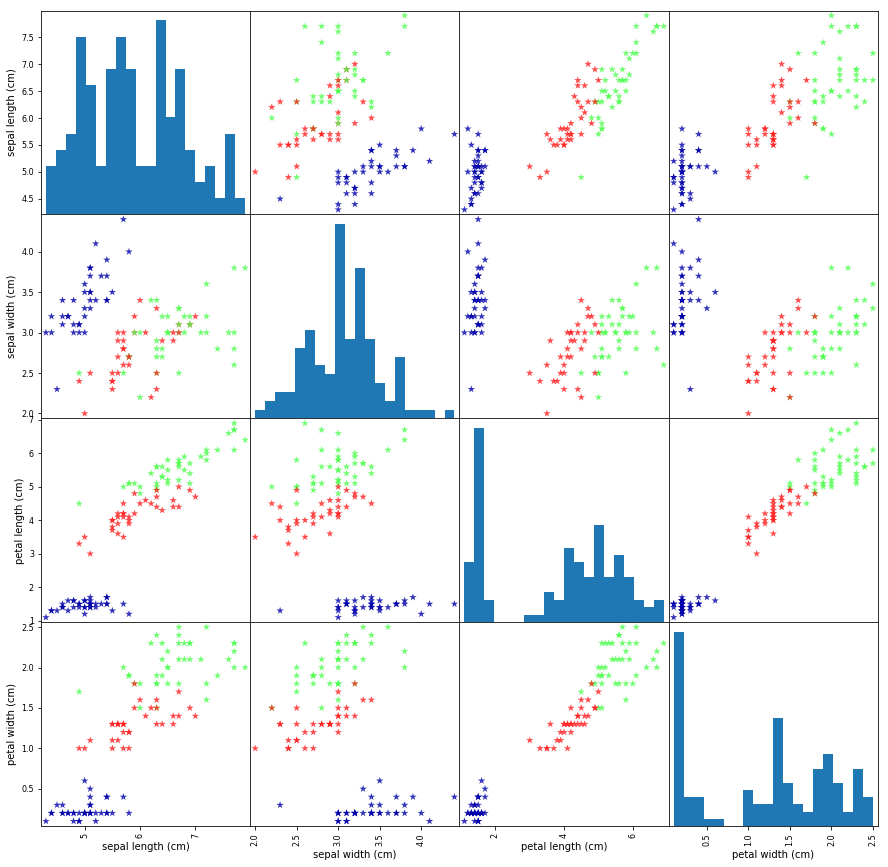

In [20]:
# Create data frame
data_frame = pd.DataFrame(data_train, columns = iris_data.feature_names)

# Create the scatter matrix
scatter_matrix = pd.plotting.scatter_matrix(data_frame, c = target_train, figsize=(15,15), marker = '*', hist_kwds ={'bins':20},s=60, alpha=.8, cmap=mglearn.cm3)

# Step 3: Building model KNN

## Create the knn Model
knn means k-nearest neighbors. knn classifier is to classify unlabeled observations by assigning them to the class of the most similar labeled observations.

The fit method returns the string representation of our classifier.

In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(data_train,target_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

## Making predictions

Using knn model, we make the predictions on new data for which we don't know the correct labels.

Example: We found an iris with a sepal length of 5.5 cm, a sepal width 3.0 cm, a petal length 0.9 cm, a petal width 0.4 cm.
We will make a prediction for this flower.

In [24]:
data_new = np.array([[5.5,3.0,0.9,0.4]])
prediction = knn.predict(data_new)
print("This flower belongs to {}".format(iris_data['target_names'][prediction]))

This flower belongs to ['setosa']


## Evaluating the model

In [27]:
print("The test score: {:.3f}".format(knn.score(data_test,target_test)))

The test score: 0.974
